<a href="https://colab.research.google.com/github/mgm22/official2020/blob/master/ai504_02_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Today's Practice Topics
1. ### Data Plotting
2. ### Generating Samples
3. ### Regression (Overfitting, underfitting)
4. ### Data Loading
5. ### Classification

In [1]:
import numpy as np
from matplotlib import pyplot as plt 
import sklearn #about Machine Learning...Scikit Learn

### Matplotlib Example

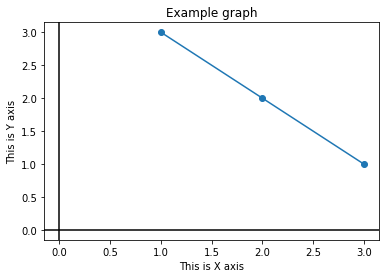

In [6]:
plt.plot([1,2,3], [3,2,1])
plt.scatter([1,2,3], [3,2,1])
plt.xlabel('This is X axis')
plt.ylabel('This is Y axis')
plt.title('Example graph')
plt.axhline(0,color='black')
plt.axvline(0, color='black')
plt.show()

In [5]:
def draw_plot(X, Y, x_sample, y_sample):
    for i in range(len(X)):
        plt.plot(X[i], Y[i])
    plt.scatter(x_sample, y_sample)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.show()

### Drawing a function

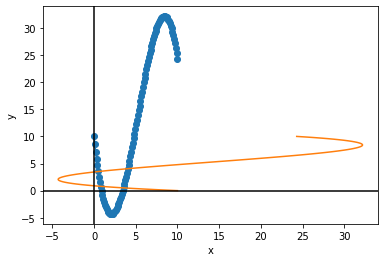

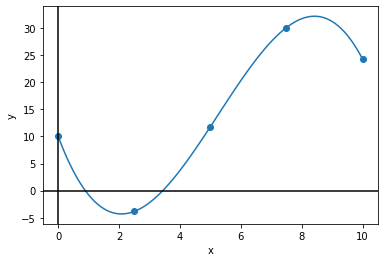

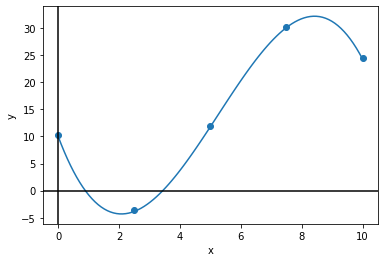

In [13]:
foo = lambda x: -(2/7*x**3-9/2*x**2+15*x-10.)
x_line = np.linspace(0, 10, 100) #100 points

y_line = foo(x_line)
#draw_plot([x_line],[y_line],x_line,y_line)
draw_plot([x_line, y_line],[y_line, x_line],x_line,y_line)
# Quiz: Draw the function foo using x_line

# Quiz: Sample 5 points of foo in the domain [0, 10] and visualize with draw_plot
x_sample = np.linspace(0,10,5)
y_sample = foo(x_sample)
draw_plot([x_line],[y_line],x_sample,y_sample)

# Quiz: Sample 5 points of foo in the domain [0, 10] with Gaussian noise where mu=0, sigma=0.1 and visualize.
x_sample = x_sample 
np.random.seed(seed=0)
y_sample = y_sample + np.random.normal(0,0.1)
draw_plot([x_line],[y_line],x_sample,y_sample)

### Linear Regression

R^2:0.555871
0.0
[2.14069095]
MSE : 62.420281


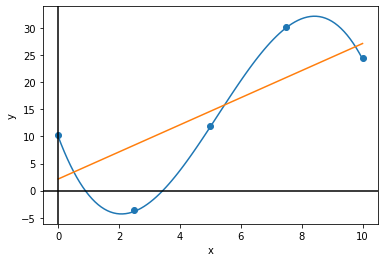

In [28]:
from sklearn.linear_model import LinearRegression

# Defining a linear regression model.
lr = LinearRegression()

# Training the linear regression model.
lr.fit(x_sample[:, None], y_sample) # expanding dimension using None, fit function deals with matrix

# Coefficient of Determination (i.e. R^2, R Squared)
r2 = lr.score(x_sample[:, None], y_sample)
print("R^2:%f" % r2)

# Predicting a single data point.
y_hat = lr.predict(x_sample[[0],None])
print(x_sample[0])
print(y_hat)
# Quiz: Calculate Mean Squared Error using x_sample and y_sample and lr.predict()
y_hat = lr.predict(x_sample[:,None])
print("MSE : %f" % ((y_sample - y_hat)**2).mean())
# Quiz: Use x_line, lr.predict() and draw_plot to visualize the linear regression model,
#       in comparison with the original function foo.
y_lr = lr.predict(x_line[:,None])
draw_plot([x_line, x_line],[y_line, y_lr],x_sample,y_sample) #under-fitting


### Polynomial Regression

[[ 0. ]
 [ 2.5]
 [ 5. ]
 [ 7.5]
 [10. ]]
[[   1.       0.       0.       0.   ]
 [   1.       2.5      6.25    15.625]
 [   1.       5.      25.     125.   ]
 [   1.       7.5     56.25   421.875]
 [   1.      10.     100.    1000.   ]]


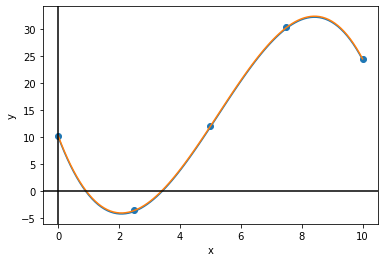

In [36]:
from sklearn.preprocessing import PolynomialFeatures

# Defining a polynomial feature transformer.
poly = PolynomialFeatures(degree=3)

# Transform the original features to polynomial features.
x_sample_poly = poly.fit_transform(x_sample[:, None])
print(x_sample[:,None])
print(x_sample_poly)
# Train a linear regression model using the polynomial features.
lr = LinearRegression().fit(x_sample_poly, y_sample)

# Quiz: Visualize the polynomial regression model, in comparison with foo.
x_line_poly = poly.fit_transform(x_line[:, None])
y_lr = lr.predict(x_line_poly)
draw_plot([x_line, x_line],[y_line, y_lr],x_sample,y_sample)
#degree = 3 fits well. over, than over-fitting occurs
# Quiz: What happens if you increase/decrease the degree of the polynomial?

### Iris Dataset

In [39]:
data_path = './iris.data'
X = []
y = []
with open(data_path, 'r') as fid:
    count = 0
    for line in fid:
        print(line.strip())
X = np.array(X)
y = np.array(y)

# Quiz: Fill the above for loop to load the data into X and y.

FileNotFoundError: ignored

In [45]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

### Train Test Split

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### Classifiers

In [63]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=1234)
logistic.fit(X_train[:, :2], y_train)

# Quiz: Import Support Vector Machine, then train SVM
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=1234)
svm.fit(X_train[:,:2],y_train)
# Quiz: Import Decision Tree, then train DT

from sklearn.tree import DecisionTreeClassifier as DTC
tree = DTC(max_depth=3, random_state=1234)
tree.fit(X_train[:,:2],y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [66]:
# Quiz: Use the model's predict() to calculate the test accuracy.
y_predict_log = logistic.predict(X_test[:,:2])
print((y_test == y_predict).astype('float').mean())
y_predict_svm = svm.predict(X_test[:,:2])
print((y_test == y_predict).astype('float').mean())
print(svm.score(X_test[:,:2],y_test))
y_predict_tree = tree.predict(X_test[:,:2])
print((y_test == y_predict).astype('float').mean())


0.6
0.6
0.7333333333333333
0.6


In [ ]:
# Quiz: Use various model options, features, and the score() fuction to compare performance.

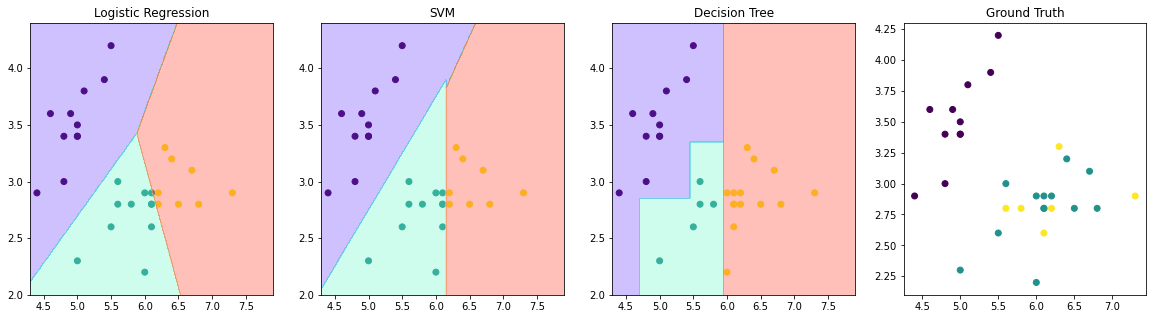

In [85]:
# Quiz: Can you draw four scatterplots for each model's predictions and the true labels? (Example shown below)
plt.figure(figsize=(20,5))

plt.subplot(141)
plt.title('Logistic Regression')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_predict_log)

grid_size = 500
A, B = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), grid_size),
                   np.linspace(X[:, 1].min(), X[:, 1].max(), grid_size))
C = logistic.predict( np.hstack([A.reshape(-1, 1), B.reshape(-1, 1)]) ).reshape(grid_size, grid_size)
plt.contourf(A, B, C, alpha=0.3, cmap=plt.cm.rainbow)



plt.subplot(142)
plt.title('SVM')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_predict_svm)

grid_size = 500
A, B = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), grid_size),
                   np.linspace(X[:, 1].min(), X[:, 1].max(), grid_size))
C = svm.predict( np.hstack([A.reshape(-1, 1), B.reshape(-1, 1)]) ).reshape(grid_size, grid_size)
plt.contourf(A, B, C, alpha=0.3, cmap=plt.cm.rainbow)

plt.subplot(143)
plt.title('Decision Tree')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_predict_tree)

grid_size = 500
A, B = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), grid_size),
                   np.linspace(X[:, 1].min(), X[:, 1].max(), grid_size))
C = tree.predict( np.hstack([A.reshape(-1, 1), B.reshape(-1, 1)]) ).reshape(grid_size, grid_size)
plt.contourf(A, B, C, alpha=0.3, cmap=plt.cm.rainbow)

plt.subplot(144)
plt.title('Ground Truth')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)


plt.show()

![Scatterplot](https://i.imgur.com/TDvaIWA.png)